In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy.special as spe
from scipy.optimize import fsolve

In [3]:
def continuidad(x, l, rho):
    y=rho*np.sqrt(x+1)
    z=rho*np.sqrt(-x)
    g=y*spe.spherical_jn(l,y,derivative=True)/spe.spherical_jn(l,y)
    h=z*spe.spherical_kn(l,z,derivative=True)/spe.spherical_kn(l,z)
    f=g-h
    return f

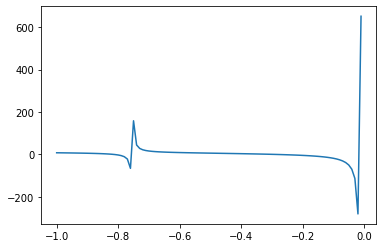

In [33]:
plt.figure()
x=np.arange(-1,0,0.01)
plt.plot(x, continuidad(x, 0, np.sqrt(40)))

In [18]:
continuidad(-0.678, 0, np.sqrt(20))

0.003709152935170046

In [22]:
def hallarCeros(f,l, rho,toi=0.0005):
    g=np.arange(-1,0, 0.00001)
    ceros=[]
    for i in range(len(g)):
        if np.abs(f(g[i],l,rho))<toi:
            ceros.append(np.round(g[i],3))       
    zeros=np.unique(ceros) 
    return zeros
hallarCeros(continuidad, 1, np.sqrt(40))

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


array([-0.63 , -0.006])

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


[0. 1.] [-0.678 -0.358]
[0. 0. 1. 2.] [-0.768 -0.136 -0.532 -0.244]
[0. 0. 1. 1. 2. 3.] [-0.818 -0.3   -0.63  -0.006 -0.399 -0.131]
[0. 0. 1. 1. 2. 3. 3. 4.] [-0.85  -0.414 -0.694 -0.14  -0.501 -0.274 -0.273 -0.018]
[0. 0. 1. 1. 2. 2. 3. 4.] [-0.872 -0.497 -0.739 -0.254 -0.573 -0.003 -0.376 -0.153]


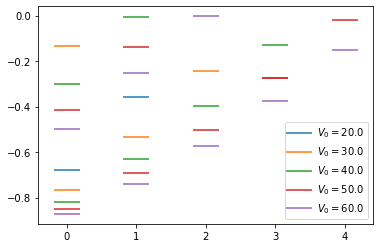

In [23]:
plt.figure()
rho=np.sqrt(np.arange(20,70,10))
l=np.arange(0,6,1)
energy=np.zeros((len(rho), len(l)))
for i in range(len(rho)):
    y=hallarCeros(continuidad, l[0], rho[i])
    x=np.ones(len(y))*l[0]
    for j in range(1,len(l)):
        a=hallarCeros(continuidad, l[j], rho[i])
        y=np.concatenate((y,a))
        x=np.concatenate((x,np.ones(len(a))*l[j]))
    print(x,y)
    plt.scatter(x,y, s=700, marker="_", label=r"$V_0=${}".format(round(rho[i]**2, 0)))
plt.legend()        

In [34]:
def tanDl(x, l, rho):
    y=rho*np.sqrt(x+1)
    z=1j*rho*np.sqrt(-x)
    g=y*spe.spherical_jn(l,z)*spe.spherical_jn(l,y, derivative=True)-z*spe.spherical_jn(l,z, derivative=True)*spe.spherical_jn(l,y)
    h=z*spe.spherical_yn(l,z, derivative=True)*spe.spherical_jn(l,y)-y*spe.spherical_jn(l,y,derivative=True)*spe.spherical_yn(l,1j*z)
    f=-g/h
    return f
    

In [35]:
def sigma(x, rho):
    s=0
    for i in range(10):
        d=tanDl(x,i,rho)/(np.sqrt(1+tanDl(x,i,rho)**2))
        s+=-4*np.pi*(2*i+1)*(d.real**2)/(rho**2*x)
    return s

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


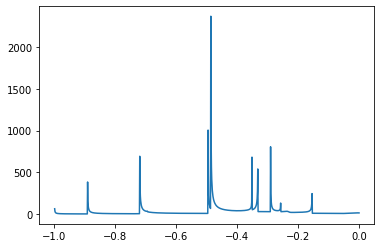

In [37]:
x=np.arange(-1,0.0,0.001)
plt.figure()
plt.plot(x, sigma(x,np.sqrt(40)))
#plt.ylim(0,1000)

In [27]:
x[sigma(x,np.sqrt(40))>50]

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


array([-0.147, -0.146, -0.145, -0.144, -0.143, -0.142, -0.141, -0.14 ,
       -0.139, -0.138, -0.137, -0.136, -0.135, -0.134, -0.016, -0.015,
       -0.014, -0.013, -0.012, -0.011, -0.01 , -0.009])

In [22]:
x

array([0.9999])